In [27]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,silhouette_score



data = pd.read_csv('/content/sample_data/reliance_data.csv')

In [6]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick


In [3]:
!pip install scikit-learn==1.3.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [7]:
data.head


<bound method NDFrame.head of             Date    Symbol Series  Prev Close     Open     High      Low  \
0     01-01-1996  RELIANCE     EQ      204.65   205.00   206.10   203.65   
1     02-01-1996  RELIANCE     EQ      205.75   205.25   206.25   202.65   
2     03-01-1996  RELIANCE     EQ      204.15   207.50   216.95   205.25   
3     04-01-1996  RELIANCE     EQ      205.70   203.75   204.40   201.05   
4     05-01-1996  RELIANCE     EQ      203.80   203.00   203.00   200.65   
...          ...       ...    ...         ...      ...      ...      ...   
6200  23-11-2020  RELIANCE     EQ     1899.50  1951.00  1970.00  1926.25   
6201  24-11-2020  RELIANCE     EQ     1950.70  1964.00  1974.00  1932.00   
6202  25-11-2020  RELIANCE     EQ     1964.05  1980.00  1992.95  1942.20   
6203  26-11-2020  RELIANCE     EQ     1947.80  1953.05  1965.00  1930.05   
6204  27-11-2020  RELIANCE     EQ     1952.60  1940.50  1956.10  1921.40   

         Last    Close     VWAP    Volume      Turnover  

In [8]:
data.shape

(6205, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6205 non-null   object 
 1   Symbol              6205 non-null   object 
 2   Series              6205 non-null   object 
 3   Prev Close          6205 non-null   float64
 4   Open                6205 non-null   float64
 5   High                6205 non-null   float64
 6   Low                 6205 non-null   float64
 7   Last                5657 non-null   float64
 8   Close               6205 non-null   float64
 9   VWAP                6205 non-null   float64
 10  Volume              6205 non-null   int64  
 11  Turnover            6205 non-null   float64
 12  Trades              2356 non-null   float64
 13  Deliverable Volume  4693 non-null   float64
 14  %Deliverble         4693 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 727.3

In [10]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,6205.000000,6205.000000,6205.000000,6205.000000,5657.000000,6205.000000,6205.000000,6.205000e+03,6.205000e+03,2.356000e+03,4.693000e+03,4693.000000
mean,864.978445,866.381176,878.763811,852.795649,925.596986,865.291289,865.851146,6.215219e+06,5.187662e+14,1.383690e+05,2.239901e+06,0.436332
std,588.711275,590.165211,599.625939,578.473998,581.604138,588.763023,588.941488,5.479271e+06,7.539147e+14,1.260736e+05,1.861021e+06,0.145526
min,0.000000,102.600000,105.600000,99.600000,101.600000,101.300000,101.840000,5.282000e+04,3.480000e+12,2.991000e+03,2.909700e+04,0.076300
25%,335.200000,335.000000,340.700000,329.500000,437.550000,335.350000,335.710000,3.021751e+06,1.840000e+14,7.119900e+04,1.178486e+06,0.323000
50%,850.650000,852.500000,862.000000,842.100000,892.350000,850.700000,851.680000,4.602904e+06,3.270000e+14,9.841550e+04,1.784092e+06,0.452300
75%,1089.400000,1091.100000,1107.000000,1073.950000,1129.900000,1089.850000,1089.480000,7.304408e+06,5.730000e+14,1.559778e+05,2.685974e+06,0.546300
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473430e+16,1.428490e+06,3.495888e+07,0.978300


In [11]:
print(data.isnull().sum())

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                   548
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                3849
Deliverable Volume    1512
%Deliverble           1512
dtype: int64


In [9]:
data.shape

(6205, 15)

In [13]:
duplicate_dates = data[data.duplicated('Date', keep=False)]
data.drop_duplicates(subset='Date', inplace=True)
data.to_csv('reliance_data.csv', index=False)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(-1000.0, 0, '18-11-2016'),
  Text(0.0, 0, '01-01-1996'),
  Text(1000.0, 0, '05-01-2000'),
  Text(2000.0, 0, '31-12-2003'),
  Text(3000.0, 0, '24-12-2007'),
  Text(4000.0, 0, '06-01-2012'),
  Text(5000.0, 0, '18-01-2016'),
  Text(6000.0, 0, '04-02-2020'),
  Text(7000.0, 0, '')])

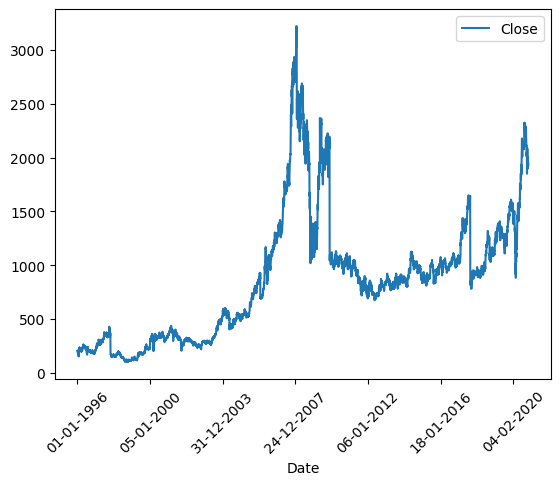

In [12]:
data.plot(x='Date', y='Close')
plt.xticks(rotation=45)

In [35]:
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] =data['Close'].rolling(window=200).mean()

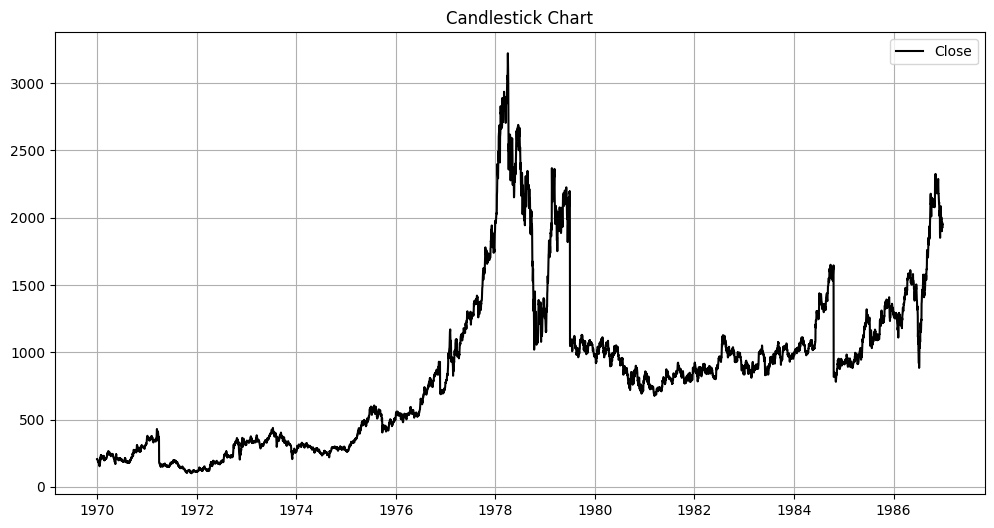

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f'Candlestick Chart')
ax.plot(data.index, data['Close'], label='Close', color='black')
ax.xaxis_date()
ax.grid()
ax.legend()
plt.show()

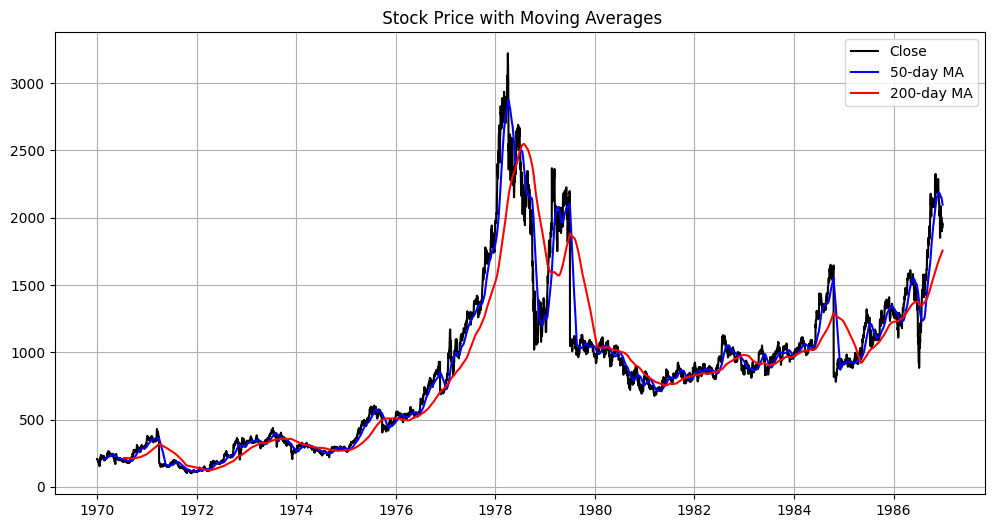

In [39]:
# Plotting Moving Averages
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f' Stock Price with Moving Averages')
ax.plot(data.index, data['Close'], label='Close', color='black')
ax.plot(data.index, data['MA_50'], label='50-day MA', color='blue')
ax.plot(data.index, data['MA_200'], label='200-day MA', color='red')
ax.xaxis_date()
ax.grid()
ax.legend()
plt.show()

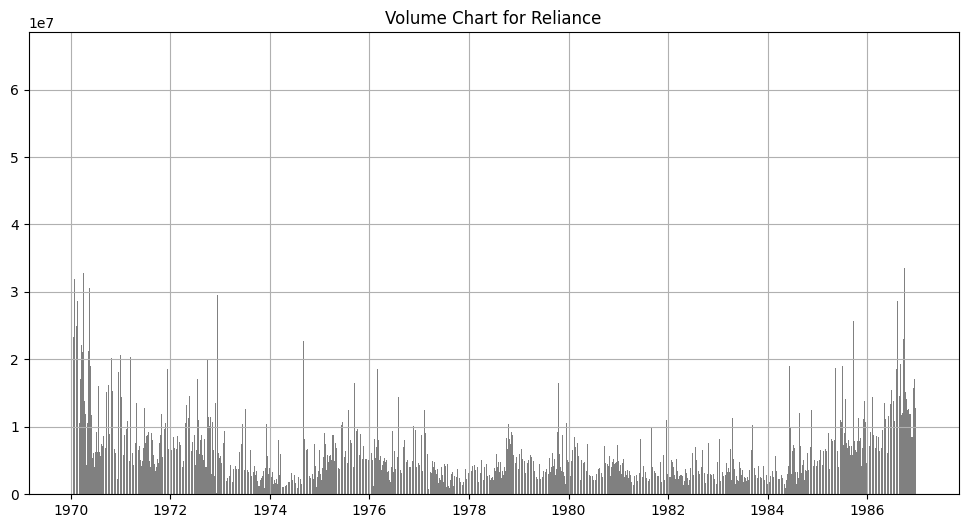

In [40]:
# Plotting Volume Chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f'Volume Chart for Reliance')
ax.bar(data.index, data['Volume'], color='grey')
ax.xaxis_date()
ax.grid()
plt.show()

In [14]:
# correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                    Prev Close      Open      High       Low      Last  \
Prev Close            1.000000  0.999242  0.998930  0.998841  0.998425   
Open                  0.999242  1.000000  0.999580  0.999465  0.998984   
High                  0.998930  0.999580  1.000000  0.999245  0.999456   
Low                   0.998841  0.999465  0.999245  1.000000  0.999487   
Last                  0.998425  0.998984  0.999456  0.999487  1.000000   
Close                 0.998626  0.999152  0.999562  0.999580  0.999982   
VWAP                  0.999021  0.999553  0.999754  0.999754  0.999792   
Volume               -0.061667 -0.061567 -0.055602 -0.065586  0.052587   
Turnover              0.481016  0.481562  0.485951  0.478925  0.481184   
Trades                0.593556  0.595381  0.610873  0.583157  0.598155   
Deliverable Volume    0.149633  0.149685  0.153525  0.146005  0.149843   
%Deliverble           0.147753  0.147182  0.142370  0.151615  0.145878   

                       Close      VWA

<ipython-input-14-6ada07bb2a70>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [15]:
# Hypothesis Testing
import scipy.stats as stats
alpha = 0.05
open = data['Open']
close = data['Close']

corr_coef, p_value = stats.pearsonr(open, close)

In [16]:
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between Open and Close.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between open and Close")


Reject the null hypothesis. There is a significant correlation between Open and Close.


In [17]:
# creating new features
data['Day'] = pd.to_datetime(data['Date']).dt.day
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Year'] = pd.to_datetime(data['Date']).dt.year


<ipython-input-17-024e162c441d>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Day'] = pd.to_datetime(data['Date']).dt.day
<ipython-input-17-024e162c441d>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Month'] = pd.to_datetime(data['Date']).dt.month
<ipython-input-17-024e162c441d>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Year'] = pd.to_datetime(data['Date']).dt.year


In [18]:
print(data['Year'])

0       1996
1       1996
2       1996
3       1996
4       1996
        ... 
6200    2020
6201    2020
6202    2020
6203    2020
6204    2020
Name: Year, Length: 6202, dtype: int64


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(data[['VWAP', 'Day', 'Month', 'Year']])

In [20]:
X = data[['Open','High','Low','Volume']]
y = data['Close']

In [21]:
#train- test- validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [22]:
data = load_iris()
X, y = data.data, data.target

In [23]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
rf_regressor.score(X_test, y_test)

0.9994686755669369

In [25]:
# support vector machine
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)
svm_regressor.score(X_test, y_test)

0.01990697389761764

In [28]:
# k-means clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)

# (Unsupervised Learning)
kmeans_clusters = kmeans_model.predict(X)
print("\nK-Means Clustering:")
print("Silhouette Score:", silhouette_score(X, kmeans_clusters))
print("Inertia:", kmeans_model.inertia_)


K-Means Clustering:
Silhouette Score: 0.5528190123564095
Inertia: 78.851441426146


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
# cross vaidation on 5 folds
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.99940392 0.9995313  0.99921369 0.99950223 0.99924364]
Mean Cross-Validation Score: 0.9993789569836788


In [30]:
final_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [31]:
#final_model.score(X_test,y_test)
y_pred = final_model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("R-squared Score:", r_squared)

R-squared Score: 0.9988711699275805


In [32]:
# evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 380.0834696362978
Mean Absolute Error (MAE): 14.281789688762284
R-squared (R2): 0.9988711699275805


In [33]:
import joblib


joblib.dump(rf_regressor, 'model.pkl')

['model.pkl']